# Transverse field quantum Ising chain

$$ \mathcal{H} = -\sum_{\langle i, j \rangle} \hat{\sigma}_i^z \otimes \hat{\sigma}_j^z - h\sum_i \hat{\sigma}_i^x $$

$$ \hat{\sigma}^z\left| \downarrow \right\rangle = \left| \downarrow \right\rangle $$

$$ \hat{\sigma}^z\left| \uparrow \right\rangle = \left| \uparrow \right\rangle $$

$$ \hat{\sigma}^x\left| \downarrow \right\rangle = \left| \uparrow \right\rangle $$

$$ \hat{\sigma}^x\left| \uparrow \right\rangle = \left| \downarrow \right\rangle $$

Here, $\hat{\sigma}^z$ and $\hat{\sigma}^x$ are two of the three [Pauli matrices](https://en.wikipedia.org/wiki/Pauli_matrices).

Due to the $\sigma^x$ contribution, $\mathcal{H}$ is clearly *not* diagonal in the simulation basis, at least as long as $h$ is nonzero.

This is the reason why we call this a *quantum* Ising model.

In [2]:
σᶻ = [1 0; 0 -1] # \sigma <TAB> followed by \^z <TAB>

2×2 Array{Int64,2}:
 1   0
 0  -1

In [3]:
σˣ = [0 1; 1 0]

2×2 Array{Int64,2}:
 0  1
 1  0

While $\sigma^z$ is diagonal in our basis, $\sigma^x$ is purely off-diagonal.

In [4]:
σˣ * [1,0]

2-element Array{Int64,1}:
 0
 1

In [5]:
σˣ * [0,1]

2-element Array{Int64,1}:
 1
 0

In [6]:
kron(σᶻ,σᶻ) # this is the matrix of the tensor product σᶻᵢ⊗ σᶻⱼ (⊗ = \otimes <TAB>)

4×4 Array{Int64,2}:
 1   0   0  0
 0  -1   0  0
 0   0  -1  0
 0   0   0  1

In [7]:
⊗(x,y) = kron(x,y)

⊗ (generic function with 1 method)

In [8]:
σᶻ ⊗ σᶻ

4×4 Array{Int64,2}:
 1   0   0  0
 0  -1   0  0
 0   0  -1  0
 0   0   0  1

### Example: 4-site Hamiltonian

$$ \mathcal{H}_4 = -\hat{\sigma}_1^z \hat{\sigma}_2^z \hat{I}_3 \hat{I}_4 - \hat{I}_1 \hat{\sigma}_2^z \hat{\sigma}_3^z \hat{I}_4 - \hat{I}_1 \hat{I}_2 \hat{\sigma}_3^z \hat{\sigma}_4^z - \hat{\sigma}^z_1 \hat{I}_2 \hat{I}_3 \hat{\sigma}_4^z - h\left(\hat{\sigma}_1^x\hat{I}_2 \hat{I}_3\hat{I}_4 + \hat{I}_1 \hat{\sigma}_2^x \hat{I}_3\hat{I}_4 +\hat{I}_1 \hat{I}_2 \hat{\sigma}_3^x\hat{I}_4 + \hat{I}_1 \hat{I}_2 \hat{I}_3 \hat{\sigma}_4^x\right) $$

In [9]:
id = [1 0; 0 1] # identity matrix

# Isn't Julia great? :)
H = - σᶻ⊗σᶻ⊗id⊗id - id⊗σᶻ⊗σᶻ⊗id - id⊗id⊗σᶻ⊗σᶻ
H -= 2*(σˣ⊗id⊗id⊗id + id⊗σˣ⊗id⊗id + id⊗id⊗σˣ⊗id)

16×16 Array{Int64,2}:
 -3   0  -2   0  -2   0   0   0  -2   0   0   0   0   0   0   0
  0  -1   0  -2   0  -2   0   0   0  -2   0   0   0   0   0   0
 -2   0   1   0   0   0  -2   0   0   0  -2   0   0   0   0   0
  0  -2   0  -1   0   0   0  -2   0   0   0  -2   0   0   0   0
 -2   0   0   0   1   0  -2   0   0   0   0   0  -2   0   0   0
  0  -2   0   0   0   3   0  -2   0   0   0   0   0  -2   0   0
  0   0  -2   0  -2   0   1   0   0   0   0   0   0   0  -2   0
  0   0   0  -2   0  -2   0  -1   0   0   0   0   0   0   0  -2
 -2   0   0   0   0   0   0   0  -1   0  -2   0  -2   0   0   0
  0  -2   0   0   0   0   0   0   0   1   0  -2   0  -2   0   0
  0   0  -2   0   0   0   0   0  -2   0   3   0   0   0  -2   0
  0   0   0  -2   0   0   0   0   0  -2   0   1   0   0   0  -2
  0   0   0   0  -2   0   0   0  -2   0   0   0  -1   0  -2   0
  0   0   0   0   0  -2   0   0   0  -2   0   0   0   1   0  -2
  0   0   0   0   0   0  -2   0   0   0  -2   0  -2   0  -1   0
  0   0   0   0   

# Basis representation

Going beyond a single spin, we have to think how to encode our basis states.

Arbitrary choice:
$0 = \text{false} = \downarrow$ and $1 = \text{true} = \uparrow$

Example: $|0010\rangle = |\text{false},\text{false},\text{true},\text{false}\rangle = |\downarrow\downarrow\uparrow\downarrow>$ is a basis state of a 4-site system

In [10]:
bit_rep(num::Integer, N::Integer) = BitArray(parse(Bool, i) for i in string(num, base=2, pad=N))


"""
    generate_basis(N::Integer) -> basis

Generates a basis (`Vector{BitArray}`) spanning the Hilbert space of `N` spins.
"""
function generate_basis(N::Integer)
    nstates = 2^N
    basis = Vector{BitArray{1}}(undef, nstates)
    for i in 0:nstates-1
        basis[i+1] = bit_rep(i, N)
    end
    return basis
end

generate_basis

In [11]:
?generate_basis

search: generate_basis



```
generate_basis(N::Integer) -> basis
```

Generates a basis (`Vector{BitArray}`) spanning the Hilbert space of `N` spins.


In [12]:
generate_basis(4)

16-element Array{BitArray{1},1}:
 [false, false, false, false]
 [false, false, false, true] 
 [false, false, true, false] 
 [false, false, true, true]  
 [false, true, false, false] 
 [false, true, false, true]  
 [false, true, true, false]  
 [false, true, true, true]   
 [true, false, false, false] 
 [true, false, false, true]  
 [true, false, true, false]  
 [true, false, true, true]   
 [true, true, false, false]  
 [true, true, false, true]   
 [true, true, true, false]   
 [true, true, true, true]    

In [13]:
using Test
@test generate_basis(4) == unique(generate_basis(4)) # no double entries

Test Passed

In [14]:
function TransverseFieldIsing(N::Integer, h::T=0) where T<:Real
    basis = generate_basis(N)
    H = zeros(T, 2^N, 2^N)
    bonds = zip(collect(1:N-1), collect(2:N))
    for (i, bstate) in enumerate(basis)
        # diagonal part
        diag_term = 0.
        for (site_i, site_j) in bonds
            diag_term -= !xor(bstate[site_i], bstate[site_j]) # xor = are they different
        end
        H[i, i] = diag_term
        
        # off diagonal part
        for site in 1:N
            new_bstate = copy(bstate)
            # flip the bit on the site (that's what σˣ does)
            new_bstate[site] ⊻= true
            new_i = findfirst(isequal(new_bstate), basis)
            H[i, new_i] = -h
        end
    end
    return Hermitian(H), basis
end

TransverseFieldIsing (generic function with 2 methods)

In [15]:
H, basis = TransverseFieldIsing(8, 1)
H

UndefVarError: UndefVarError: Hermitian not defined

In [16]:
using LinearAlgebra

In [17]:
vals, vecs = eigen(H)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
16-element Array{Float64,1}:
 -6.507626387639509 
 -6.507626387639461 
 -3.5603748712237007
 -3.560374871223691 
 -2.035490432639926 
 -2.0354904326399152
 -0.9117610837758807
 -0.9117610837758757
  0.911761083775872 
  0.9117610837758764
  2.0354904326399264
  2.035490432639927 
  3.5603748712237016
  3.560374871223706 
  6.507626387639501 
  6.507626387639504 
eigenvectors:
16×16 Array{Float64,2}:
 -0.00252845   -0.572097     -0.027729     …  -0.206731   -0.0141641
  0.2962       -0.00130909   -0.593784         0.0214975  -0.313765 
 -0.0011938    -0.270113     -0.00562518       0.417765    0.0286231
  0.373823     -0.00165216   -0.426305        -0.0160391   0.234098 
 -0.00138996   -0.314497      0.000248664      0.29551     0.0202468
  0.207213     -0.000915806  -0.126262     …  -0.0391058   0.570764 
 -0.00103704   -0.234644      0.00926638      -0.372952   -0.0255527
  0.41874      -0.00185068    0.053604      

# Magnetization

Let's vary $h$ and see what happens. Since we're looking at quantum magnets we will compute the overall magnetization. This quantity is:

$$ M = \frac{1}{N}\sum_{i} \sigma^z_i $$
where $\sigma^z_i$ is the value of the spin on site $i$ when we measure.

In [18]:
function magnetization(state, basis)
    M = 0.
    for (i, bstate) in enumerate(basis)
        bstate_M = 0.
        for spin in bstate
            bstate_M += (state[i]^2 * (spin ? 1 : -1))/length(bstate)
        end
        @assert abs(bstate_M) <= 1
        M += abs(bstate_M)
    end
    return M
end

magnetization (generic function with 1 method)

In [28]:
groundstate = vec[:,1]
magnetization(groundstate, basis)

MethodError: MethodError: no method matching getindex(::typeof(vec), ::Colon, ::Int64)

Now we would like to examine the effects of $h$. We will:

1. Find a variety of $h$ to look at.
2. For each, compute the lowest energy eigenvector (groundstate) of the corresponding Hamiltonian.
3. For each groundstate, compute the overall magnetization $M$.
4. Plot $M(h)$ for a variety of system sizes, and see if anything cool happens.

[0.9996, 0.996931, 0.977618, 0.87876, 0.692449, 0.574108, 0.526891, 0.509676, 0.503478, 0.50125]
[0.999845, 0.998738, 0.988945, 0.905212, 0.673904, 0.555449, 0.518677, 0.506546, 0.502331, 0.500835]
[0.999875, 0.999023, 0.991945, 0.917586, 0.591575, 0.437996, 0.395981, 0.382355, 0.377621, 0.375939]
[0.99989, 0.999146, 0.993221, 0.933149, 0.576326, 0.427273, 0.391981, 0.380908, 0.3771, 0.375752]
[0.9999, 0.999224, 0.993893, 0.942106, 0.531264, 0.366666, 0.330129, 0.318646, 0.314686, 0.313283]
[0.999907, 0.99928, 0.994341, 0.948502, 0.518565, 0.359841, 0.327708, 0.31778, 0.314375, 0.313171]
[0.999912, 0.999321, 0.994672, 0.952577, 0.487899, 0.321452, 0.288917, 0.278821, 0.275351, 0.274123]
[0.999917, 0.999354, 0.994927, 0.955496, 0.47711, 0.316678, 0.287257, 0.278231, 0.275139, 0.274047]
[0.99992, 0.999379, 0.995132, 0.957622, 0.454014, 0.289611, 0.260052, 0.250942, 0.247816, 0.24671]


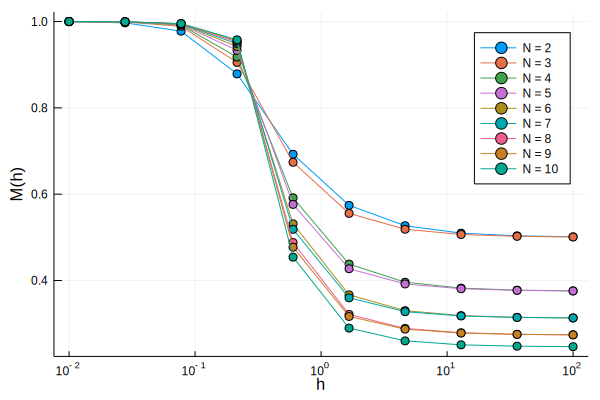

In [20]:
using Plots
hs = 10 .^ range(-2., stop=2., length=10)
Ns = 2:10
p = plot()
for N in Ns
    M = zeros(length(hs))
    for (i,h) in enumerate(hs)
        H, basis = TransverseFieldIsing(N, h)
        vals, vecs = eigen(H)
        groundstate = vecs[:,1]
        M[i] = magnetization(groundstate, basis)
    end
    plot!(p, hs, M, xscale=:log10, marker=:circle, label="N = $N",
        xlab="h", ylab="M(h)")
    println(M)
end
p

# Optional: Hamiltonian type

In [21]:
using SparseArrays

In [22]:
abstract type AbstractHamiltonian{T, S<:AbstractMatrix} <: AbstractMatrix{T} end

LinearAlgebra.ishermitian(A::AbstractHamiltonian) = true # always hermitian!

In [23]:
struct QuantumIsing{T, S<:AbstractMatrix} <: AbstractHamiltonian{T, S}
    N::Int
    basis::Vector
    mat::S
    h::T
    
    function QuantumIsing(N::Integer, h::T=0.) where {T<:Real, S<:Matrix}
        basis = generate_basis(N)
        H = zeros(T, 2^N, 2^N)
        bonds = zip(collect(1:N-1), collect(2:N))
        for (i, bstate) in enumerate(basis)
            # diagonal part
            diag_term = 0.
            for (site_i, site_j) in bonds
                diag_term -= !xor(bstate[site_i], bstate[site_j]) # xor = are they different
            end
            H[i, i] = diag_term

            # off diagonal part
            for site in 1:N
                new_bstate = copy(bstate)
                # flip the bit on the site (that's what σˣ does)
                new_bstate[site] ⊻= true
                new_i = findfirst(isequal(new_bstate), basis)
                H[i, new_i] = -h
            end
        end
        mat = Hermitian(H)
        new{T, typeof(mat)}(N, basis, mat, h)
    end
end

Base.size(H::QuantumIsing)               = size(H.mat)
Base.ndims(H::QuantumIsing)              = 2
Base.getindex(H::QuantumIsing, args...) = getindex(H.mat, args...)

LinearAlgebra.eigen(H::QuantumIsing; kwargs...) = eigen(H.mat; kwargs...)

In [24]:
H = QuantumIsing(4,0.1)

16×16 QuantumIsing{Float64,Hermitian{Float64,Array{Float64,2}}}:
 -3.0  -0.1  -0.1   0.0  -0.1   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -0.1  -2.0   0.0  -0.1   0.0  -0.1      0.0   0.0   0.0   0.0   0.0   0.0
 -0.1   0.0  -1.0  -0.1   0.0   0.0     -0.1   0.0   0.0   0.0   0.0   0.0
  0.0  -0.1  -0.1  -2.0   0.0   0.0      0.0  -0.1   0.0   0.0   0.0   0.0
 -0.1   0.0   0.0   0.0  -1.0  -0.1      0.0   0.0  -0.1   0.0   0.0   0.0
  0.0  -0.1   0.0   0.0  -0.1   0.0  …   0.0   0.0   0.0  -0.1   0.0   0.0
  0.0   0.0  -0.1   0.0  -0.1   0.0      0.0   0.0   0.0   0.0  -0.1   0.0
  0.0   0.0   0.0  -0.1   0.0  -0.1      0.0   0.0   0.0   0.0   0.0  -0.1
 -0.1   0.0   0.0   0.0   0.0   0.0     -0.1   0.0  -0.1   0.0   0.0   0.0
  0.0  -0.1   0.0   0.0   0.0   0.0      0.0  -0.1   0.0  -0.1   0.0   0.0
  0.0   0.0  -0.1   0.0   0.0   0.0  …   0.0  -0.1   0.0   0.0  -0.1   0.0
  0.0   0.0   0.0  -0.1   0.0   0.0     -0.1  -1.0   0.0   0.0   0.0  -0.1
  0.0   0.0   0.0   0.0  -0.1   0.0

In [43]:
eigen(H)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
16-element Array{Float64,1}:
 -3.030867401976878   
 -3.029331387034287   
 -2.1537509705501763  
 -2.152214955607583   
 -2.00153601494259    
 -1.9999999999999956  
 -1.8771164314266984  
 -1.8755804164841061  
 -1.1244195835158937  
 -1.1228835685733025  
 -1.0                 
 -0.9984639850574086  
 -0.8477850443924141  
 -0.8462490294498229  
  0.02933138703428223 
  0.030867401976872866
eigenvectors:
16×16 Array{Float64,2}:
 0.697549    -0.698809      1.95816e-14  …   4.94396e-16   0.00710408
 0.0714099   -0.0682146     0.346932         0.0342706    -0.0362477 
 0.0362477   -0.0342706     0.0413132       -0.0682146    -0.0714099 
 0.0208868   -4.84899e-14   0.505032         0.00334534    0.0106021 
 0.0362477   -0.0342706    -0.0413132        0.0682146    -0.0714099 
 0.00710408  -1.65952e-14   0.0283802    …  -0.698809      0.697549  
 0.0106021    0.00334534   -1.39819e-14      9.19403e-16   0.0208868 
 0.07

In [41]:
function Base.show(io::IO, ::MIME"text/plain", H::QuantumIsing)
    println(io, "Quantum Ising Hamiltonian:");
    Base.print_array(io, H.mat)
end

In [42]:
H

Quantum Ising Hamiltonian:
 -3.0  -0.1  -0.1   0.0  -0.1   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
 -0.1  -2.0   0.0  -0.1   0.0  -0.1      0.0   0.0   0.0   0.0   0.0   0.0
 -0.1   0.0  -1.0  -0.1   0.0   0.0     -0.1   0.0   0.0   0.0   0.0   0.0
  0.0  -0.1  -0.1  -2.0   0.0   0.0      0.0  -0.1   0.0   0.0   0.0   0.0
 -0.1   0.0   0.0   0.0  -1.0  -0.1      0.0   0.0  -0.1   0.0   0.0   0.0
  0.0  -0.1   0.0   0.0  -0.1   0.0  …   0.0   0.0   0.0  -0.1   0.0   0.0
  0.0   0.0  -0.1   0.0  -0.1   0.0      0.0   0.0   0.0   0.0  -0.1   0.0
  0.0   0.0   0.0  -0.1   0.0  -0.1      0.0   0.0   0.0   0.0   0.0  -0.1
 -0.1   0.0   0.0   0.0   0.0   0.0     -0.1   0.0  -0.1   0.0   0.0   0.0
  0.0  -0.1   0.0   0.0   0.0   0.0      0.0  -0.1   0.0  -0.1   0.0   0.0
  0.0   0.0  -0.1   0.0   0.0   0.0  …   0.0  -0.1   0.0   0.0  -0.1   0.0
  0.0   0.0   0.0  -0.1   0.0   0.0     -0.1  -1.0   0.0   0.0   0.0  -0.1
  0.0   0.0   0.0   0.0  -0.1   0.0      0.0   0.0  -2.0  -0.1  -0.1   0.